# Homework 2 - Least Squares
Make sure you have downloaded:
- housing.csv

In this assignment we will use data about the price of housing vs lot size

In [1]:
######## DO NOT CHANGE THIS CODE ##########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")
display(df)
###########################################

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


# 1 Create training and test data
## 1.1 Get X and y
1. [1 pt] Define the following numpy arrays by choosing the correct columns of the housing dataframe:
    - $\texttt{X}$, which contains the 'lotsize' column
    - $\texttt{y}$, which contains the 'price' column
2. [1 pt] Print the shapes of $\texttt{X}$ and $\texttt{y}$.

In [2]:
# TODO extract price and lotsize columns as np arrays
X = df.lotsize.values
y = df.price.values


# TODO print the shapes of X and Y
print(X.shape)
print(y.shape)

(546,)
(546,)


## 1.2 Train-test split
1. [1 pt] Create new numpy column arrays called $\texttt{X\_train, X\_test, y\_train}$, and $\texttt{y\_test}$, where:
    - you use train_test_split() function from sklearn.model_selection
    - the training dataset contains the 80% of samples
    - the testing dataset contains the 20% of samples
    - random state set to 0.

2. [2 pt] Print the shape of the training and testing datasets. Make sure the prints are informative.

In [3]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) #test data set 20% of samples


# TODO print
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (436,)
X_test:  (110,)
y_train:  (436,)
y_test:  (110,)


## 1.3 Scatter plot
1. [1 pt] On the same figure, make scatterplots of the training and testing data.
    - x-coordinate should be the lot size, X, and 
    - y-coordinate should be the price, Y.
2. [1 pt] Use markers with different shapes and colors to show to training and testing datasets. 
3. [1 pt] Include 
    - x axis labels, 
    - y axis labels, 
    - grid lines,
    - an approapriate title, and 
    - a legend.

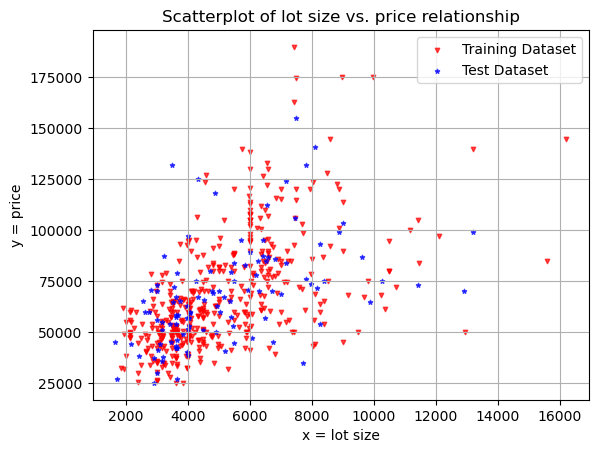

In [4]:
# TODO plot
import matplotlib.pyplot as plt



plt.scatter(X_train, y_train, s = 10, c = 'r', alpha = 0.7, marker='v', label = 'Training Dataset')
plt.scatter(X_test, y_test, s = 10, c = 'b', alpha = 0.7, marker='*', label = 'Test Dataset')

plt.xlabel('x = lot size')
plt.ylabel('y = price')
plt.title('Scatterplot of lot size vs. price relationship')
plt.legend()
plt.grid()
plt.show()

# 2 (Manual) Least Squares Linear Regression
## 2.1 Obtain coefficients
[2 pt] Without using sklearn or other packages, implement least squares linear regression to fit a line to the __training__ data using the linear model, 
    $$Y=a^T X + b,$$
    where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. (You should follow the implementation seen in lecture.)

Compute the fitted values for $a$ and $b$ and print them. 
- Make sure you specify in your prints, which is $a$ and which is $b$.

In [5]:
# TODO code up manual linear regression

a_numerator = 0;  #initialization of numerator/denominator of a
a_denominator = 0; 

#manually derived formulas for a and b

X_samp_avg = np.mean(X_train)
y_samp_avg = np.mean(y_train)

for i in range(436):
    a_numerator += (X_train[i] - X_samp_avg)*(y_train[i] - y_samp_avg)
    a_denominator += ((X_train[i] - X_samp_avg) * (X_train[i] - X_samp_avg))
    
a = a_numerator / a_denominator

b = y_samp_avg - a * X_samp_avg


beta = [b, a]

# TODO compute a and b and print

print('a: ', a)
print('b: ', b)


a:  7.000228875604552
b:  32139.515782094408


## 2.2 Predict
[1 pt] Use your custom fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_linear}$. Your method should involve matrix multiplications.

In [6]:
# TODO predict

X = np.ones((X_test.size,2)); #2x2 matrix with all ones

X[:,1] = X_test #second column of matrix has values of X_test

#print(X)

Y_test_pred_linear = X @ beta

print(Y_test_pred_linear)



[ 77500.99889601  86741.30101181  89891.40400583  70605.77345354
  58460.37635437  68330.69906897  62380.50452471  74560.90276826
  79181.05382616  57760.35346681  53140.20240891  57340.33973427
  67420.66931514  94301.54819746  49990.09941489  82226.15338704
  59860.42212949  84221.21861659  86041.27812425  70290.76315414
  77080.98516348  84641.23234913  73776.87713419  59860.42212949
  65040.59149744  70640.77459792  57550.34660054  88841.36967449
  52510.1818101   63640.54572231  65845.61781813  67105.65901574
  57620.34888929  66300.63269504  61960.49079217  51740.15663379
  65530.60751873  57683.35094918  54435.24475089  50410.11314742
  95141.57566254  79391.06069243  68540.70593524  60700.44959456
  75918.94717013 104024.86610568  79741.07213621  47260.0101534
 122442.46827739 124542.53694007  69940.75171036  56080.29853666
  78341.02636108  89191.38111827  66790.64871634  59090.39695317
  69660.74255533  56290.30540293 112012.12725274  77816.00919541
  54820.25733905  60693.44

# 3 (sklearn) Least Squares Linear Regression
## 3.1 Obtain coefficients
[2 pt] Use sklearn.linear_model.LinearRegression to fit a linear model to the training data. See their documentation for how to use the model.
- You may need to reshape the data to column arrays by array.reshape(-1,1).

Extract the fitted values for $a$ and $b$ and print them. Make sure you specify in your prints, which is $a$ and which is $b$.
- At this point, you should verify that the $a$ and $b$ values you obtained manually and by sklearn are basically the same.

In [7]:
from sklearn.linear_model import LinearRegression

# TODO use sklearn

reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# TODO extract a and b, and print

a = reg.coef_
b = reg.intercept_

print('a = ', a[0,0])
print('b = ', b[0])

a =  7.000228875604559
b =  32139.51578209437


## 3.2 Predict
[1 pt] Use your sklearn fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_sklearn}$. You should use sklearn functions/methods for this.

In [8]:
# TODO predict
Y_test_pred_sklearn = reg.predict(X_test.reshape(-1,1))

Y_test_pred_sklearn

array([[ 77500.99889601],
       [ 86741.30101181],
       [ 89891.40400583],
       [ 70605.77345354],
       [ 58460.37635437],
       [ 68330.69906897],
       [ 62380.50452471],
       [ 74560.90276826],
       [ 79181.05382616],
       [ 57760.35346681],
       [ 53140.20240891],
       [ 57340.33973427],
       [ 67420.66931514],
       [ 94301.54819746],
       [ 49990.09941489],
       [ 82226.15338704],
       [ 59860.42212949],
       [ 84221.21861659],
       [ 86041.27812425],
       [ 70290.76315414],
       [ 77080.98516348],
       [ 84641.23234913],
       [ 73776.87713419],
       [ 59860.42212949],
       [ 65040.59149744],
       [ 70640.77459792],
       [ 57550.34660054],
       [ 88841.36967449],
       [ 52510.1818101 ],
       [ 63640.54572231],
       [ 65845.61781813],
       [ 67105.65901574],
       [ 57620.34888929],
       [ 66300.63269504],
       [ 61960.49079217],
       [ 51740.15663379],
       [ 65530.60751873],
       [ 57683.35094918],
       [ 544

## 3.3 Verify correctness
[1 pt] Write code, with any relevant prints, to verify that $\texttt{Y\_test\_pred\_linear}$ and $\texttt{Y\_test\_pred\_sklearn}$ are the same.    
- You can use the np.allclose() function. You may need to flatten the sklearn prediction array $\texttt{Y\_test\_pred\_sklearn}$.

In [9]:
# TODO verify
Y_test_pred_sklearn
Y_test_pred_linear

Y_test_pred_sklearn = Y_test_pred_sklearn.flatten('C')

np.allclose(Y_test_pred_sklearn, Y_test_pred_linear, rtol=1e-05, atol=1e-08, equal_nan=False)


True

## 3.4 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on linear model.
3. Straight line plot of linear model, which you should base of the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

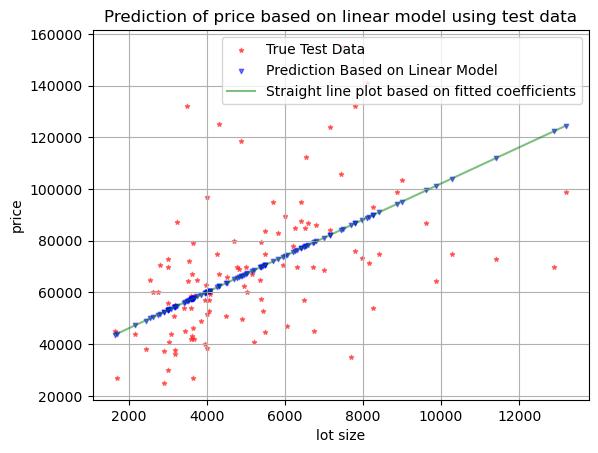

In [10]:
# TODO plot

x_values = np.linspace(min(X_test), max(X_test), 100)
y_values = x_values * a[0,0] + b

plt.scatter(X_test, y_test, s = 10, c = 'r', alpha = 0.5, marker='*', label = 'True Test Data')
plt.scatter(X_test, Y_test_pred_linear, s = 10, c = 'b', alpha = 0.5, marker='v', label = 'Prediction Based on Linear Model')


plt.plot(x_values, y_values, c = 'g', alpha = 0.5, label = 'Straight line plot based on fitted coefficients') 

plt.xlabel('lot size')
plt.ylabel('price')
plt.title('Prediction of price based on linear model using test data')
plt.legend()
plt.grid()
plt.show()

## 3.5 Discuss
[1 pt] Is the method of least squares linear regression appropriate for the housing data? Why or why not? In particular, we seek your reflection on whether the data is suitable for linear modelling.

**Ans:** I don't think the method of least squares linear regression is appropriate for the housing data because there appears to be many outliers that could skew the results that we obtain. Furthermore, the variance of the errors seems to increase as the lot size increases, meaning that we can't assume homoscedasticity in our model (which is an assumption of linear regression).

# 4 (Manual) Least Squares on 4th order polynomial
## 4.1 Obtain Coefficients
Now, suppose we instead used the 4th order polynomial model
$$
Y = a_4 x^4 +  a_3x^3 + \dots + a_1 x + a_0.
$$
[2 pt] Compute and print the fitted coefficients $a_0, \dots, a_4$. You must do this using the custom/manual method, not via sklearn package. 
- Print them to 12 decimal places.

In [11]:
# TODO code up custom linear regression

X = np.ones((X_train.size,5));
X[:,1] = X_train
X[:,2] = X_train**2
X[:,3] = X_train**3
X[:,4] = X_train**4 #X is a matrix with columns of 1, x, x^2, x^3, and x^4

beta = np.linalg.inv(X.T @ X) @ (X.T @ y_train)

#print(beta)


# TODO compute a and b, and print

# Set print options to display 12 decimal places
np.set_printoptions(precision=12, suppress=True)

print("Fitted Coefficients:")
for i, coef in enumerate(beta):
    print(f"a{i}: {coef:.12f}")

Fitted Coefficients:
a0: 74489.425011477520
a1: -31.715031089679
a2: 0.010557857235
a3: -0.000001049992
a4: 0.000000000033


In [16]:
X.shape

(436, 5)

## 4.2 Predict
[1 pt] Use your fitted coefficients to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_poly}$. Your method should involve matrix multiplications.

In [12]:
# TODO predict

X_test_mat = np.ones((X_test.size,5));
X_test_mat[:,1] = X_test
X_test_mat[:,2] = X_test**2
X_test_mat[:,3] = X_test**3
X_test_mat[:,4] = X_test**4

Y_test_pred_poly = beta @ X_test_mat.T

Y_test_pred_poly

array([84640.6545945232  , 93013.51391739972 , 94329.09126065004 ,
       74804.07743630924 , 55267.735560064364, 71141.8824635728  ,
       61327.43780323318 , 80739.03308577568 , 86629.17073919713 ,
       54268.77708367407 , 48681.42020515868 , 53685.26131530035 ,
       69646.3582808823  , 94830.08000132156 , 46250.00174709482 ,
       89728.60678039725 , 57352.743842018404, 91379.9129356014  ,
       92611.21812742055 , 74305.35949382675 , 84114.81466856076 ,
       91687.64837904737 , 79618.08409990775 , 57352.743842018404,
       65700.25935130182 , 74859.29683502906 , 53975.465958328256,
       93980.55006183338 , 48089.92280394401 , 63385.30121747129 ,
       67036.91150093656 , 69126.04823783555 , 54072.895742572764,
       67792.30036238587 , 60649.81725213172 , 47434.68644804478 ,
       66513.75812625157 , 54160.874825975596, 50040.946382157854,
       46493.39016590508 , 94755.36732810331 , 86864.3288480275  ,
       71485.0289411269  , 58650.760120077146, 82603.618376012

## 4.3 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on polynomial model.
3. Curved line plot of polynomial model, which are based off the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

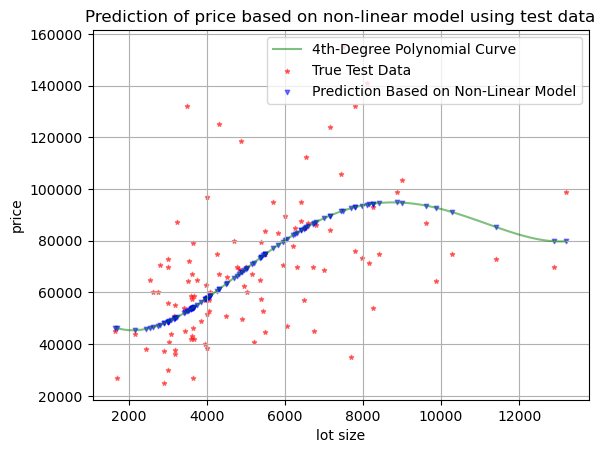

In [13]:
# TODO plot

# Create a polynomial from the coefficients in reverse order
polynomial = np.poly1d(np.flip(beta))

# Generate x values for the plot
x_values = np.linspace(min(X_test), max(X_test), 100)

# Calculate the corresponding y values using the polynomial
y_values = polynomial(x_values)

# Plot the polynomial curve
plt.plot(x_values, y_values, label='4th-Degree Polynomial Curve', color='g', alpha = 0.5)

plt.scatter(X_test, y_test, s = 10, c = 'r', alpha = 0.5, marker='*', label = 'True Test Data')
plt.scatter(X_test, Y_test_pred_poly, s = 10, c = 'b', alpha = 0.5, marker='v', label = 'Prediction Based on Non-Linear Model')
#plt.plot(sorted_X_test, sorted_X_test @ beta, c = 'g', alpha = 0.5, label = 'Curved line plot based on fitted coefficients') 

plt.xlabel('lot size')
plt.ylabel('price')
plt.title('Prediction of price based on non-linear model using test data')
plt.legend()
plt.grid()
plt.show()

## 4.4 Compare linear (1st order) and polynomial (4th order)
1. [1 pt] Compute the residual sum of squares (RSS) on the test points of both:
- 1st order model, $\texttt{rss\_linear}$
- 4th order model, $\texttt{rss\_poly}$

(The residual is "the actual values of $\texttt{Y}$" minus "predicted values from the linear model." RSS is the sum of (squares of residual); this is just a (nonnegative) scalar value that gives one way to measure performance of the models.)

2. [1 pt] Print $\texttt{rss\_linear}$ and $\texttt{rss\_poly}$.

In [14]:
# TODO compute RSS

rss_linear = (Y_test_pred_linear - y_test) **2

rss_poly = (Y_test_pred_poly - y_test) ** 2

# TODO print RSS


rss_sum_linear = sum(rss_linear)

rss_sum_poly = sum(rss_poly)

print('rss_sum_linear: ',rss_sum_linear)

print('rss_sum_poly: ',rss_sum_poly)

print('rss_sum_poly is: ', rss_sum_poly / rss_sum_linear, 'of rss_sum_linear')


rss_sum_linear:  55591831378.39379
rss_sum_poly:  50853240555.180756
rss_sum_poly is:  0.9147610232345263 of rss_sum_linear


3. [1 pt] Which RSS is smaller? Does it necessarily mean that the model with smaller RSS is always "better"? Why or why not?

    **Ans:** RSS_poly is smaller than RSS_linear. This does not necessarily mean that the model with smaller RSS is better because it could be better at "fitting outliers", but when given more data that does not include as many outliers could perform much worse. An example of this could be measurement error - if we make a mistake in measuring price and the small RSS model fits the incorrect model very well, it might not fit a model without errors.